In [ ]:
!nvidia-smi # Connected the runtime to 'GPU'

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install ultralytics #Installing Yolo required library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
from ultralytics import YOLO
from IPython.display import display , Image
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.8/107.7 GB disk)


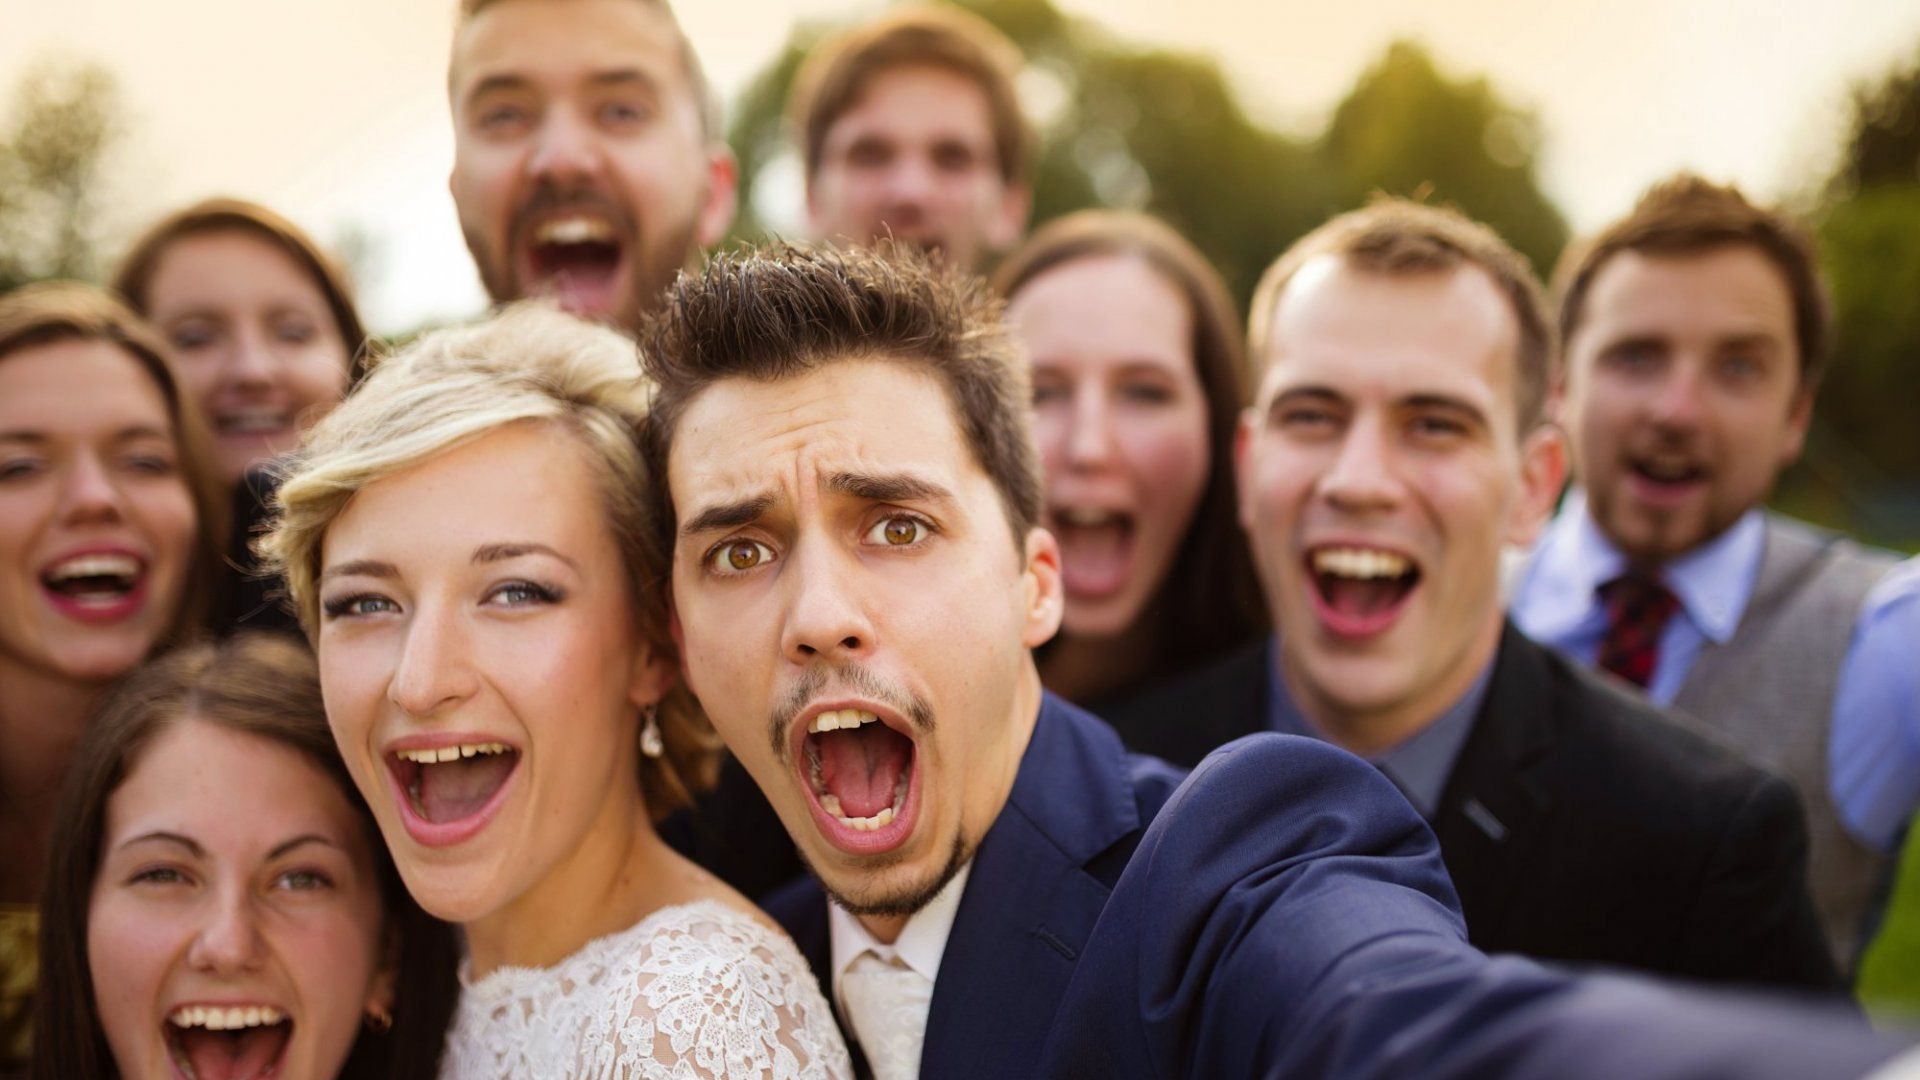

In [ ]:
Image(filename = '/content/getty_517194189_373099.jpg' , height = 300)


In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt source='/content/runs/detect/predict/getty_517194189_373099.jpg' # it will download the image and the modelthen it will do the prediction

Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/runs/detect/predict/getty_517194189_373099.jpg: 384x640 7 persons, 140.6ms
Speed: 4.1ms preprocess, 140.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


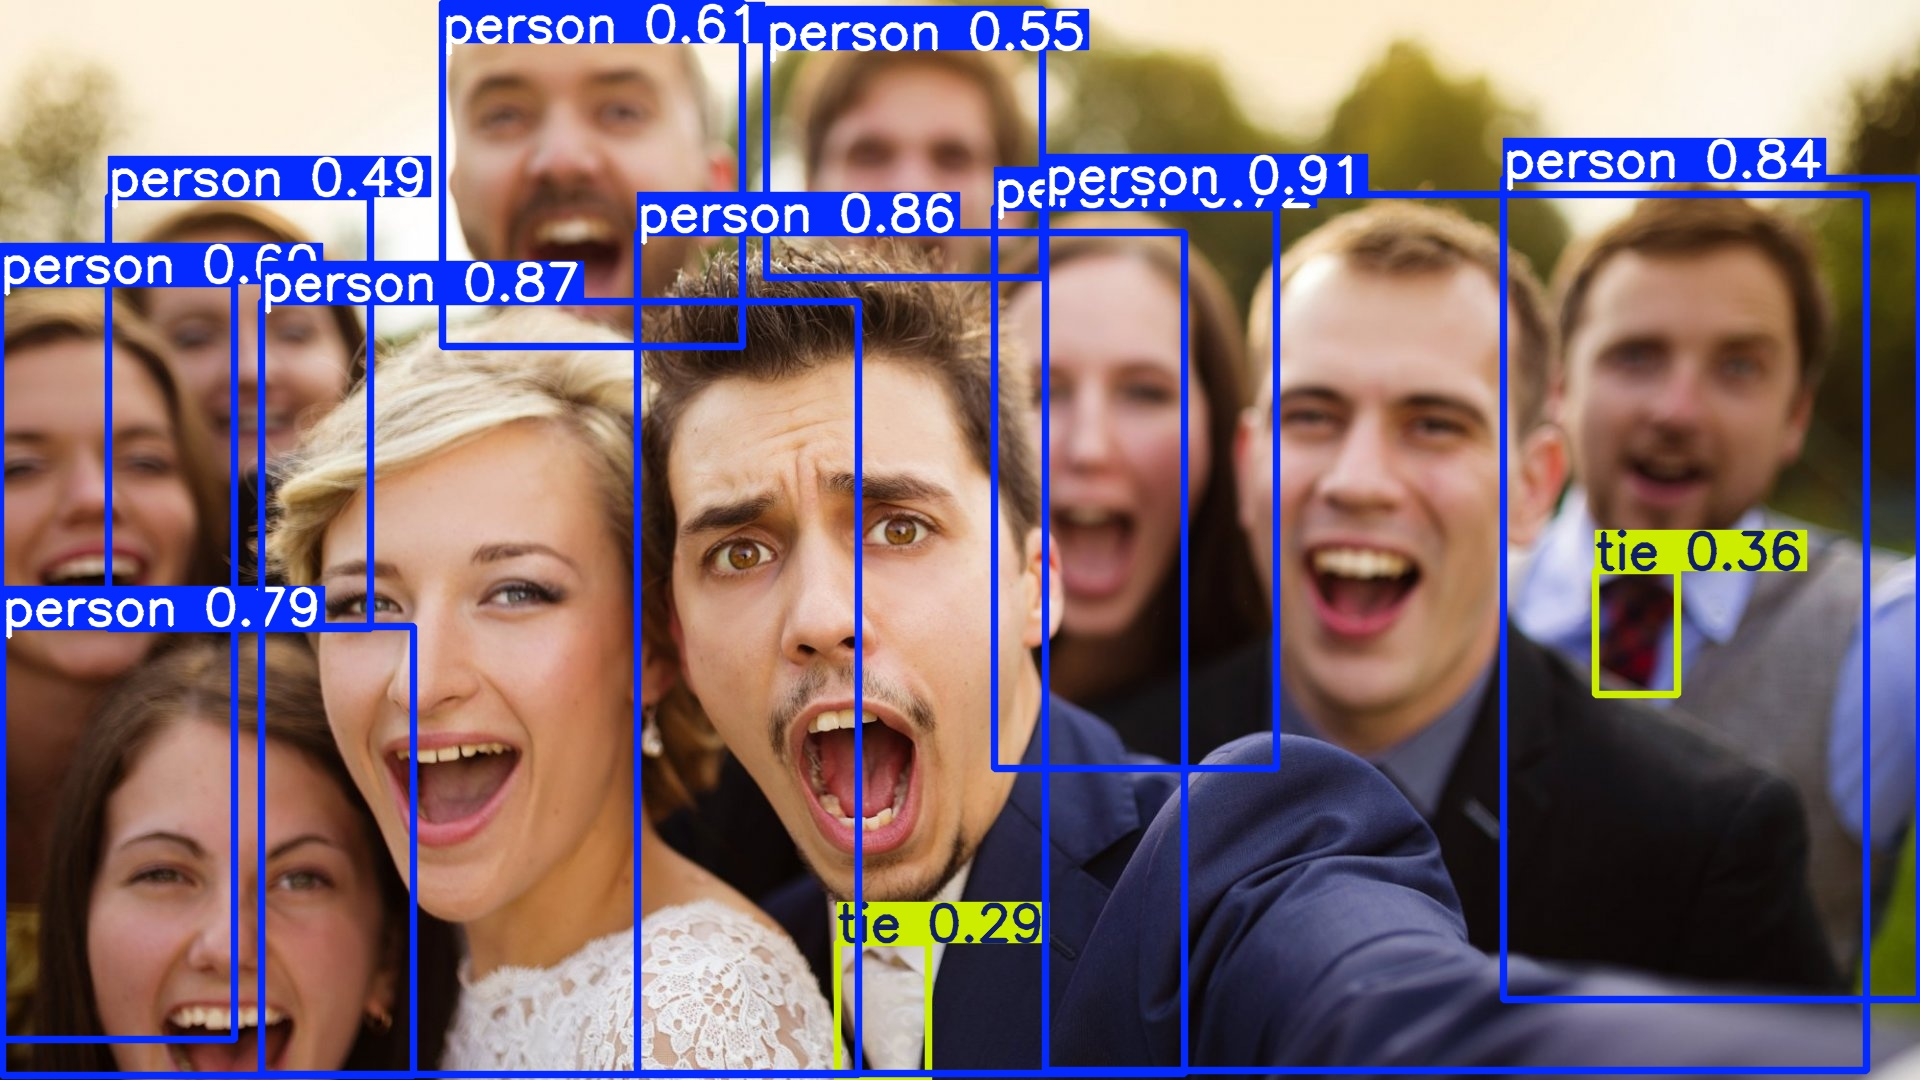

In [ ]:
Image(filename = '/content/runs/detect/predict/getty_517194189_373099.jpg' , height = 300)

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.2 MB/s eta 0:00:00


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="cdHbT9N7rvgK2WGChCph")
project = rf.workspace("detection-4nooy").project("drive-drowsiness-detection")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.81, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Drive-Drowsiness-Detection-2 in yolov8:: 100%|██████████| 492/492 [00:00<00:00, 4660.23it/s]


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="cdHbT9N7rvgK2WGChCph")
project = rf.workspace("detection-4nooy").project("drive-drowsiness-detection")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.81, to fix: `pip install ultralytics==8.0.196`


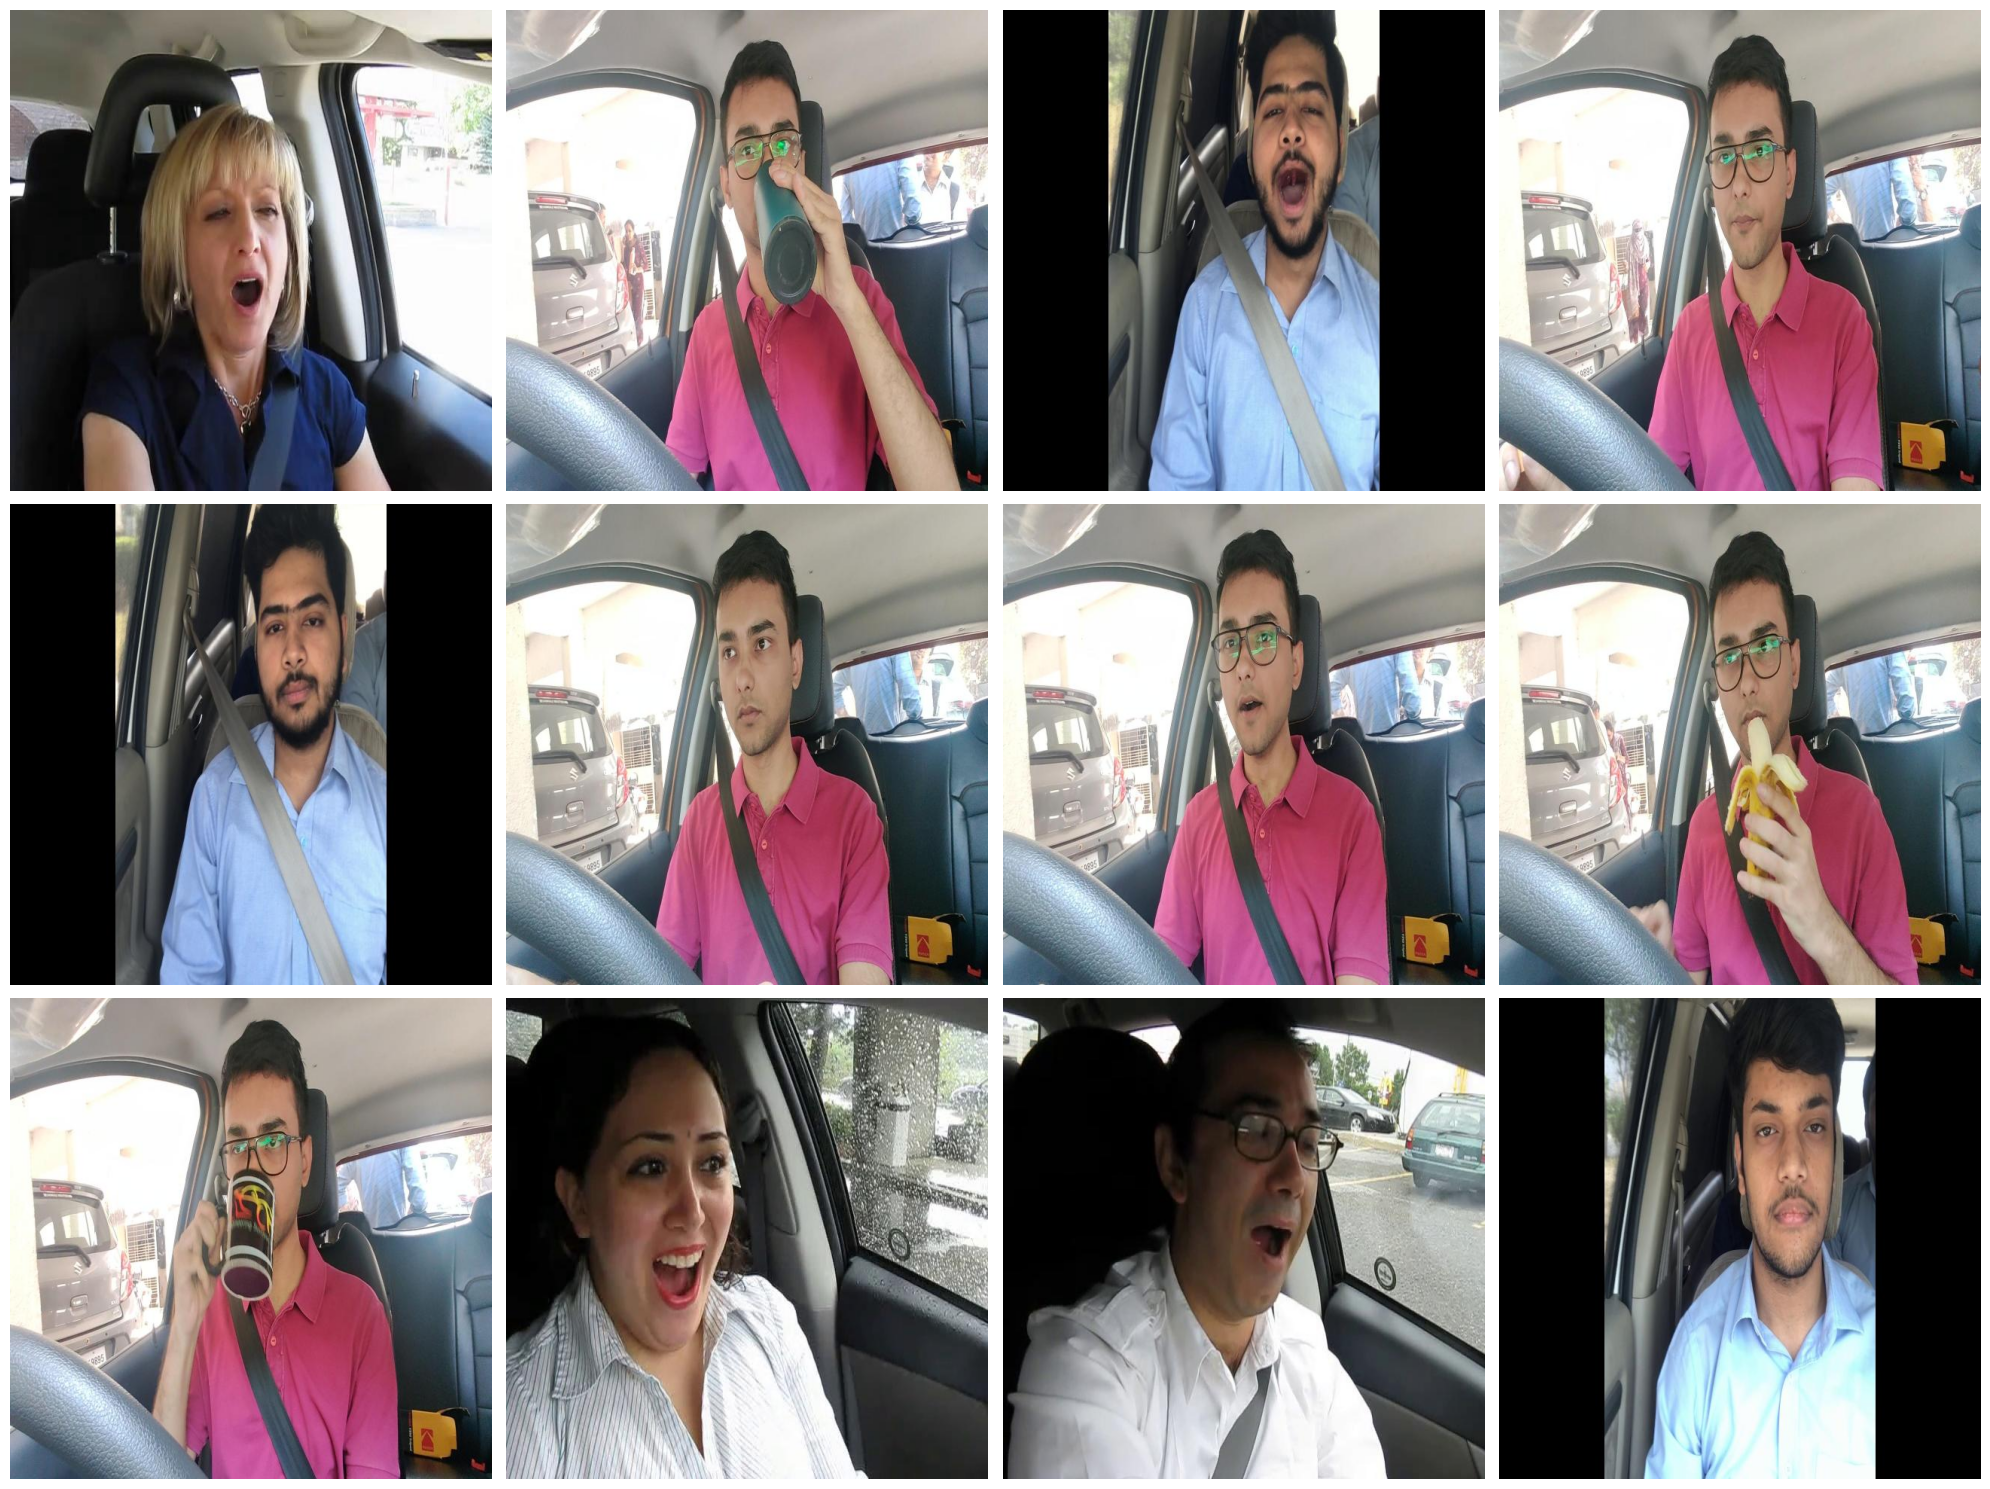

In [ ]:
import glob
from PIL import Image
import matplotlib.pyplot as plt

# Get a list of image paths
image_paths = glob.glob('/content/Drive-Drowsiness-Detection-2/train/images/*.jpg')[24:36]

# Create a figure with subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Iterate over the image paths and display images in subplots
for i, image_path in enumerate(image_paths):
    # Calculate the row and column indices of the current subplot
    row = i // 4
    col = i % 4

    # Open the image using PIL
    img = Image.open(image_path)

    # Display the image in the current subplot
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import yaml

# Read the contents of the data.yaml file
with open('/content/Drive-Drowsiness-Detection-2/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Update the paths in the test, train, and val sections
data['test'] = '/content/Drive-Drowsiness-Detection-2/test/images'
data['train'] = '/content/Drive-Drowsiness-Detection-2/train/images'
data['val'] = '/content/Drive-Drowsiness-Detection-2/valid/images'

# Write the modified data back to the data.yaml file
with open('/content/Drive-Drowsiness-Detection-2/data.yaml', 'w') as file:
    yaml.dump(data, file)